## Преобразования данных и анализ
1. Обработка пропущенных значений и ошибок в данных:
   - Заполнение отсутствующих данных для параметра "Gross".
   - Преобразование форматов данных, таких как "Runtime" и "Released_Year".
3. Анализ корреляции между рейтингами IMDb и доходами.
4. Определение самых популярных жанров и их характеристик.
5. Исследование вклада режиссёров и актёров в успех фильмов.


*Импортируем неободимые библиотеки и выгрузим датафрейм в переменную **MOVIE_DF**.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import re

In [2]:
file_path = os.path.join('data', 'IMDB.csv')
MOVIE_DF = pd.read_csv(file_path)
MOVIE_DF.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


*Далее создадим график, по которому мы сможем понять, фильмы с каким рейтингом приемущественно находятся в топ-1000 imdb.*

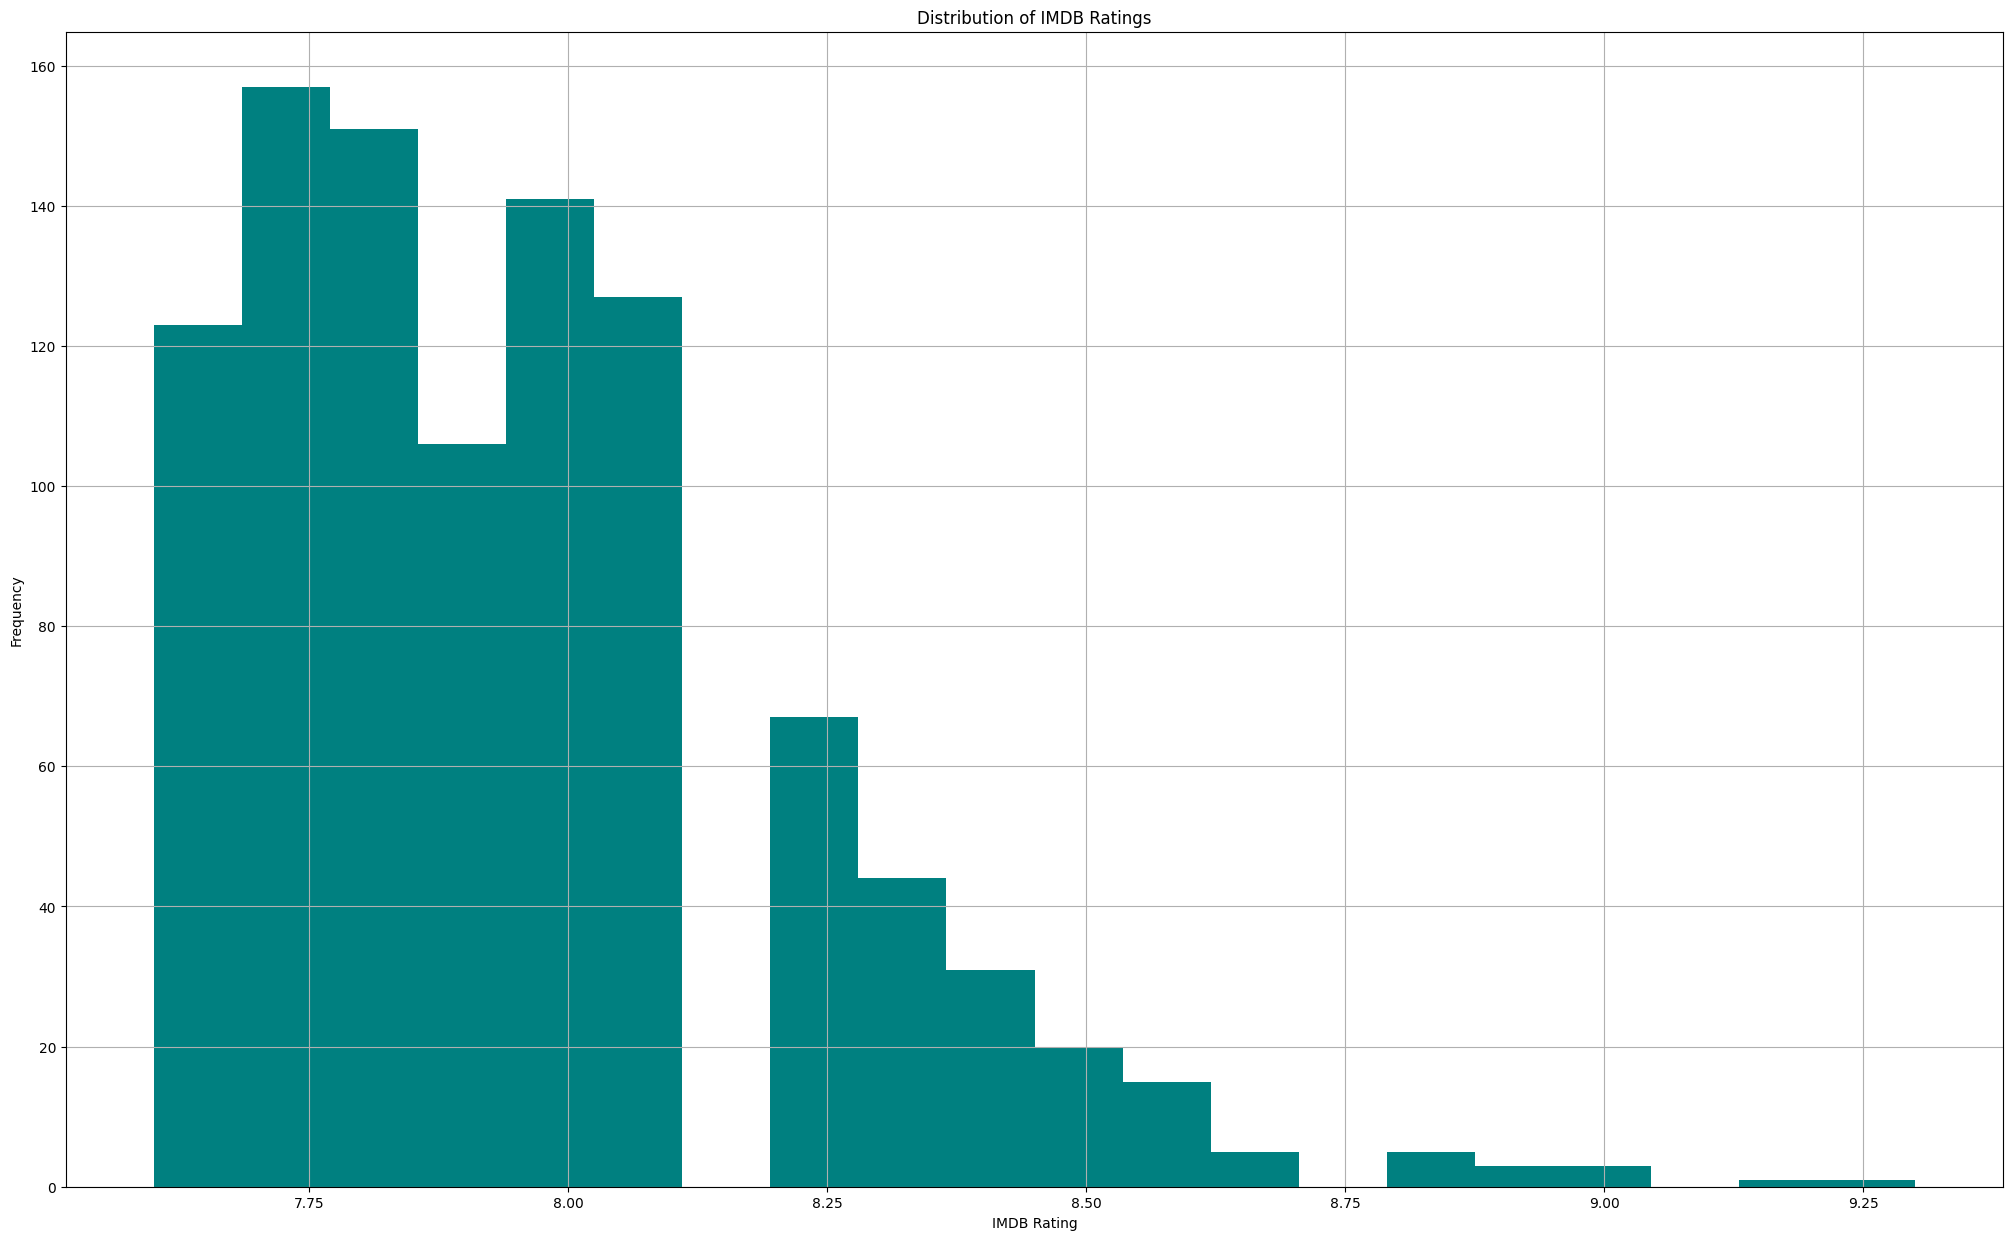

In [3]:
plt.figure(figsize=(25, 15))
MOVIE_DF['IMDB_Rating'].hist(bins=20, color='teal')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

*Вышло, что больше всего фильмов в топе с рейтингом примерно 7.75(чуть меньше 160 штук).*


*Посмотрим на график фильмов по годам. Можно заметитть, что большинство фильмов рейтинга сняты уже в 21 веке*

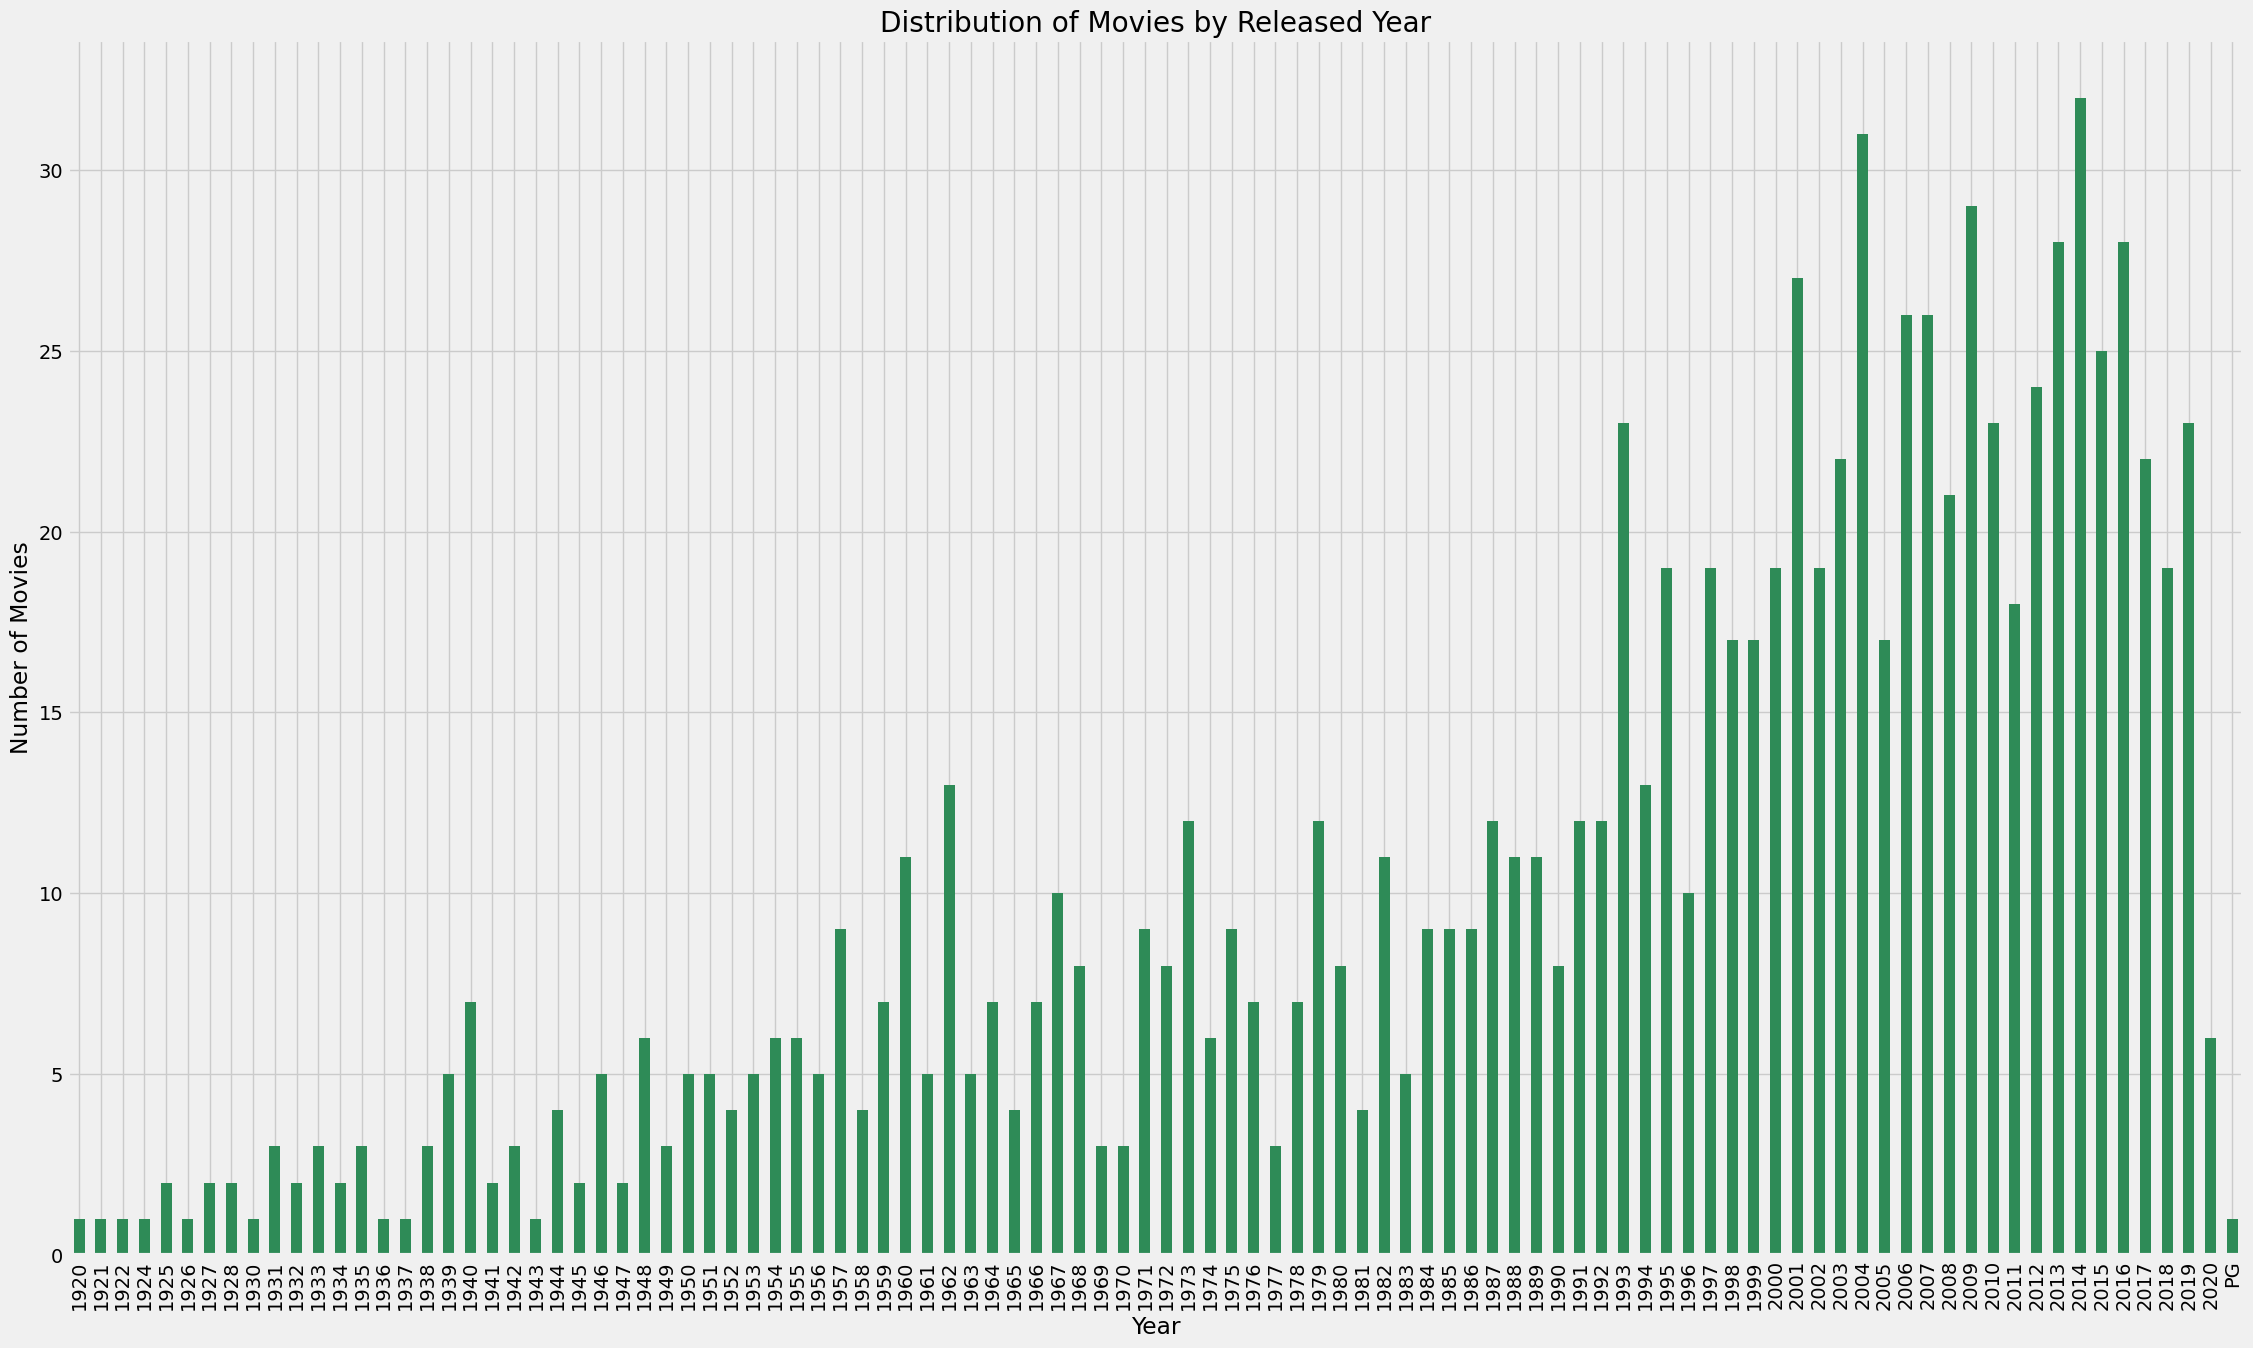

In [15]:
plt.figure(figsize=(25, 15))
MOVIE_DF['Released_Year'].value_counts().sort_index().plot(kind='bar', color='seagreen')
plt.title('Distribution of Movies by Released Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

### Средний рейтинг фильмов по году выхода
*Данный  график отображает средний рейтинг фильмов по годам*

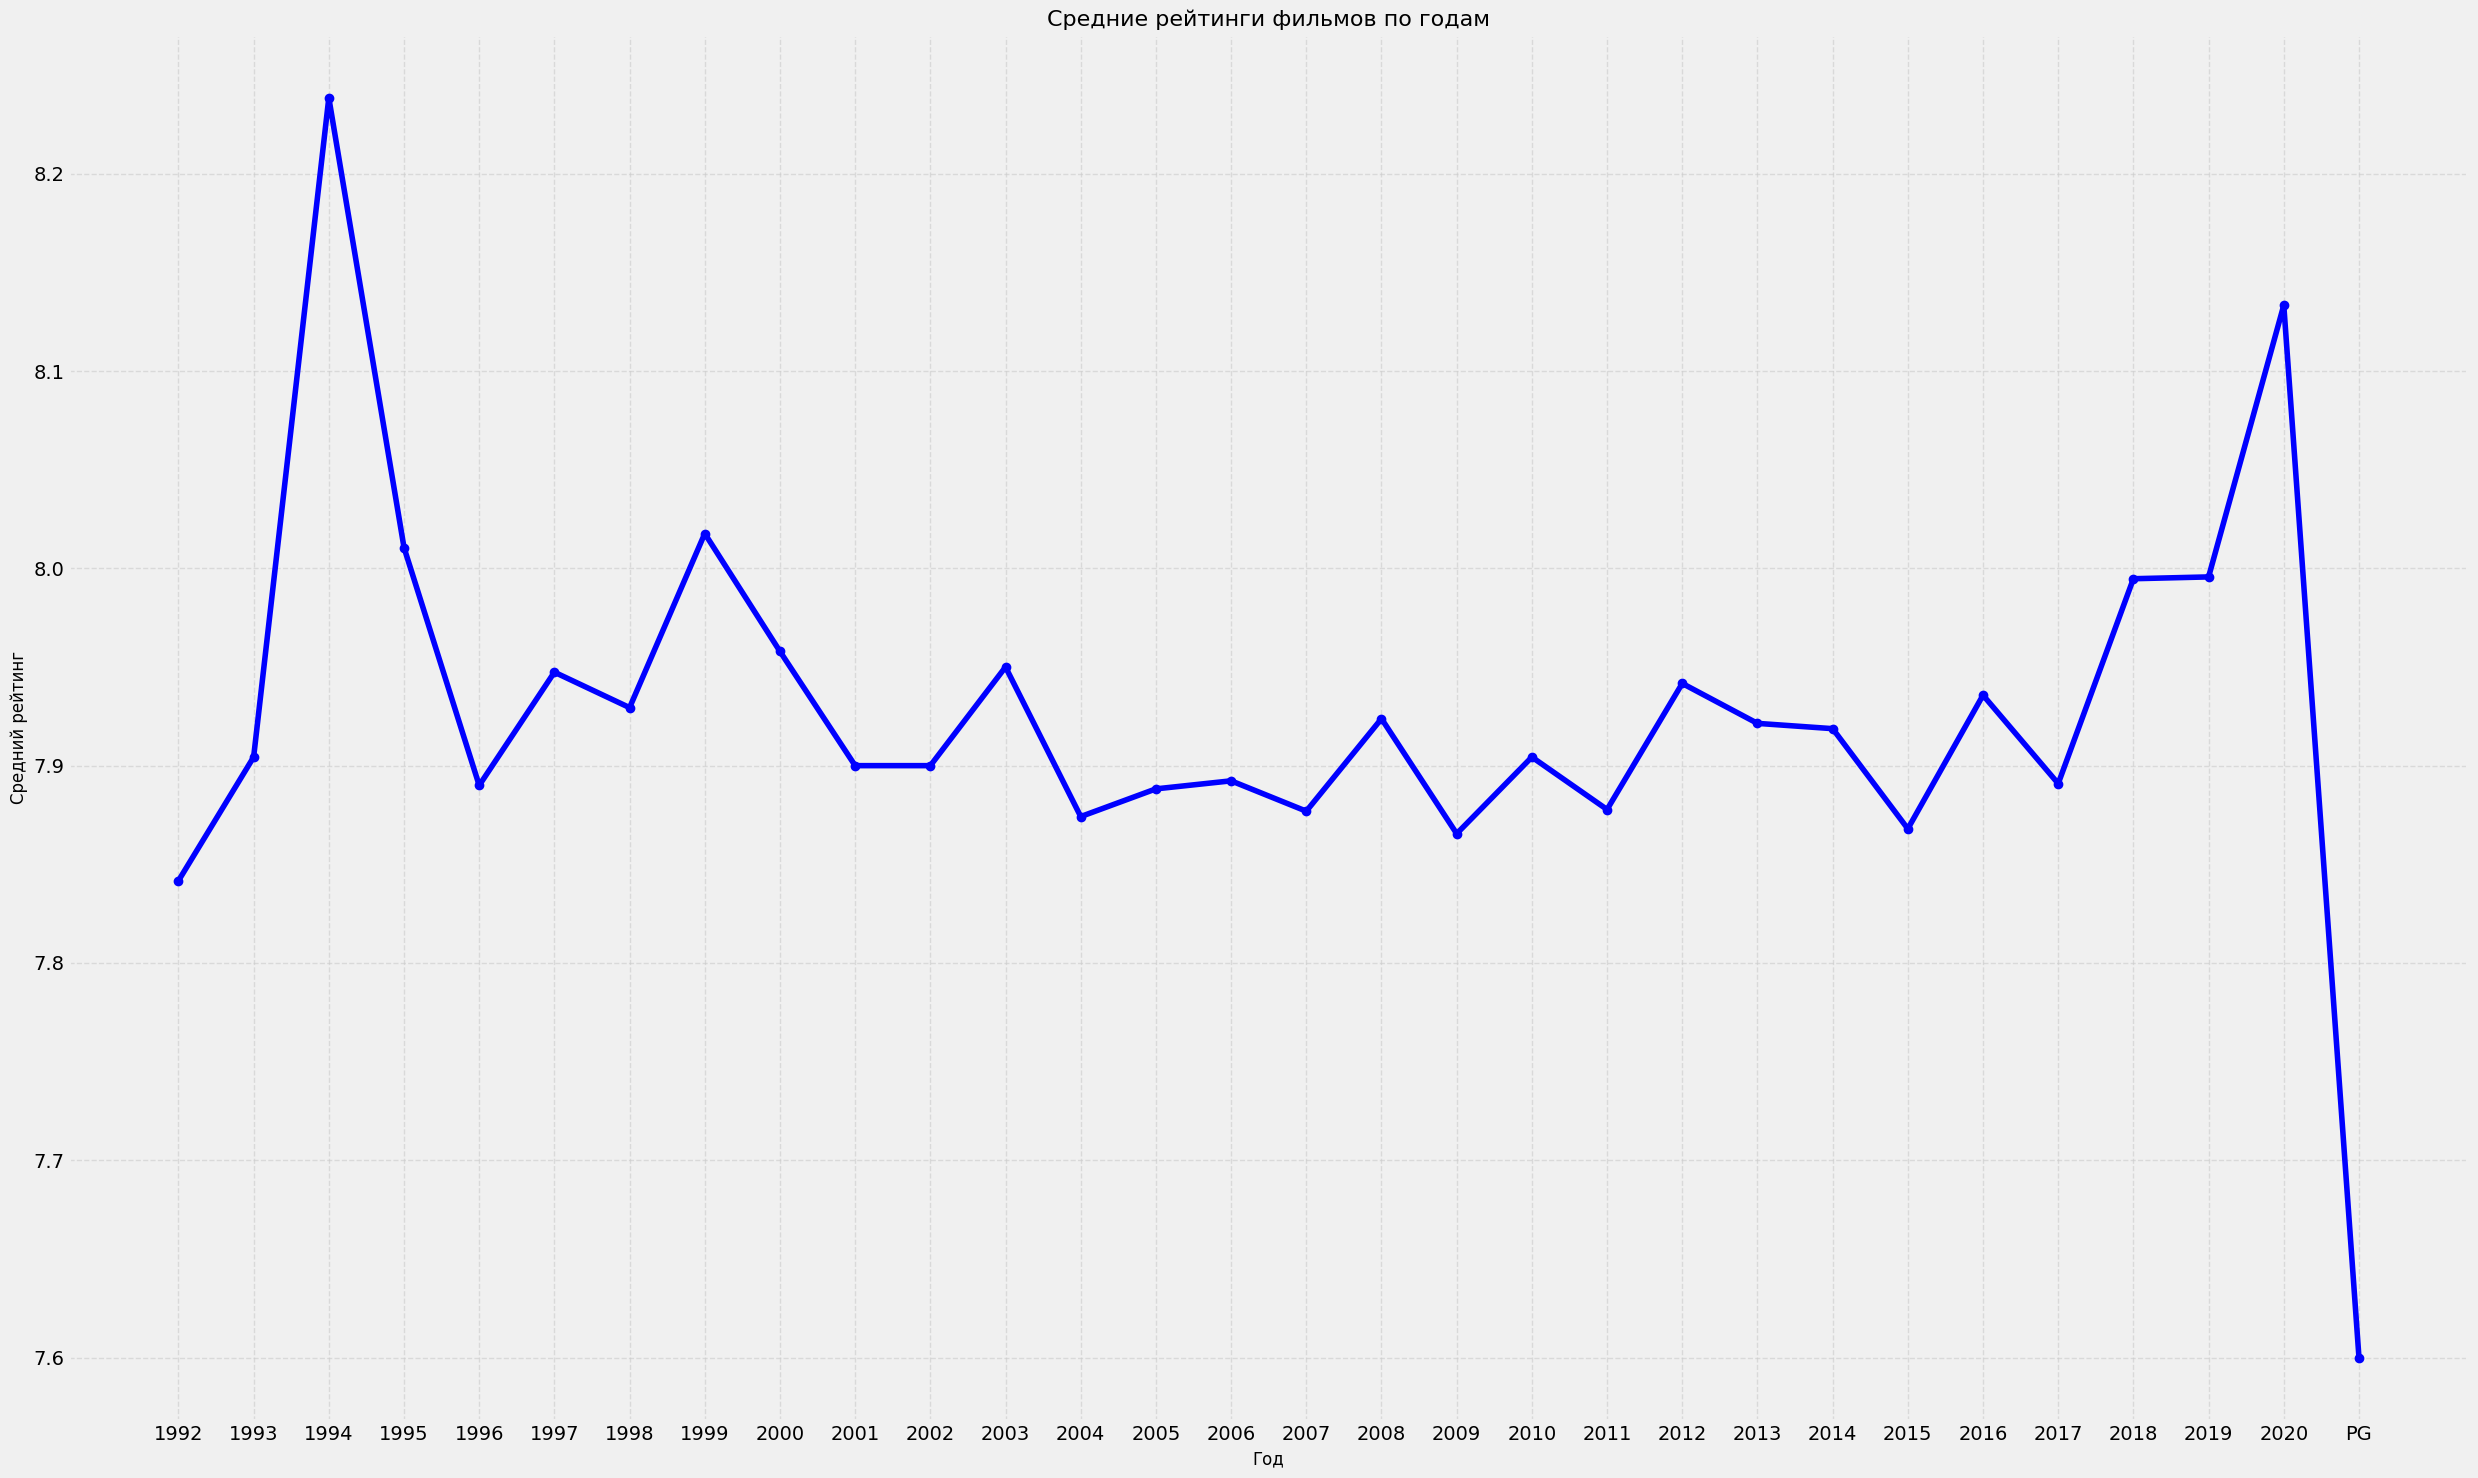

In [5]:
avg_ratings_per_year = MOVIE_DF.groupby('Released_Year')['IMDB_Rating'].mean().iloc[-30:]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,15))
plt.plot(avg_ratings_per_year.index, avg_ratings_per_year.values, marker='o', color='b')
plt.title('Средние рейтинги фильмов по годам', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Распределение оценок критиков (Metascore)
Этот график иллюстрирует распределение оценок критиков, позволяя понять, как критики оценивают фильмы в среднем.

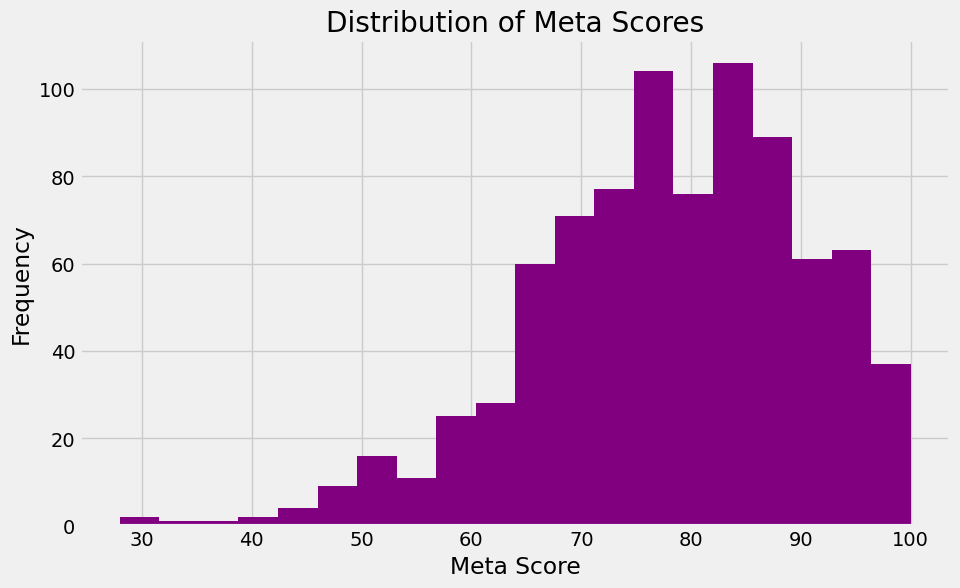

In [6]:
plt.figure(figsize=(10, 6))
MOVIE_DF['Meta_score'].hist(bins=20, color='purple')
plt.title('Distribution of Meta Scores')
plt.xlabel('Meta Score')
plt.ylabel('Frequency')
plt.show()

### Распределение фильмов по жанрам
*Этот график демонстрирует, какие жанры наиболее популярны в рассматриваемом наборе данных. Можно заметить, что драмы, экшн и комедии занимают в совокупности более 60% позиций в рейтинге*

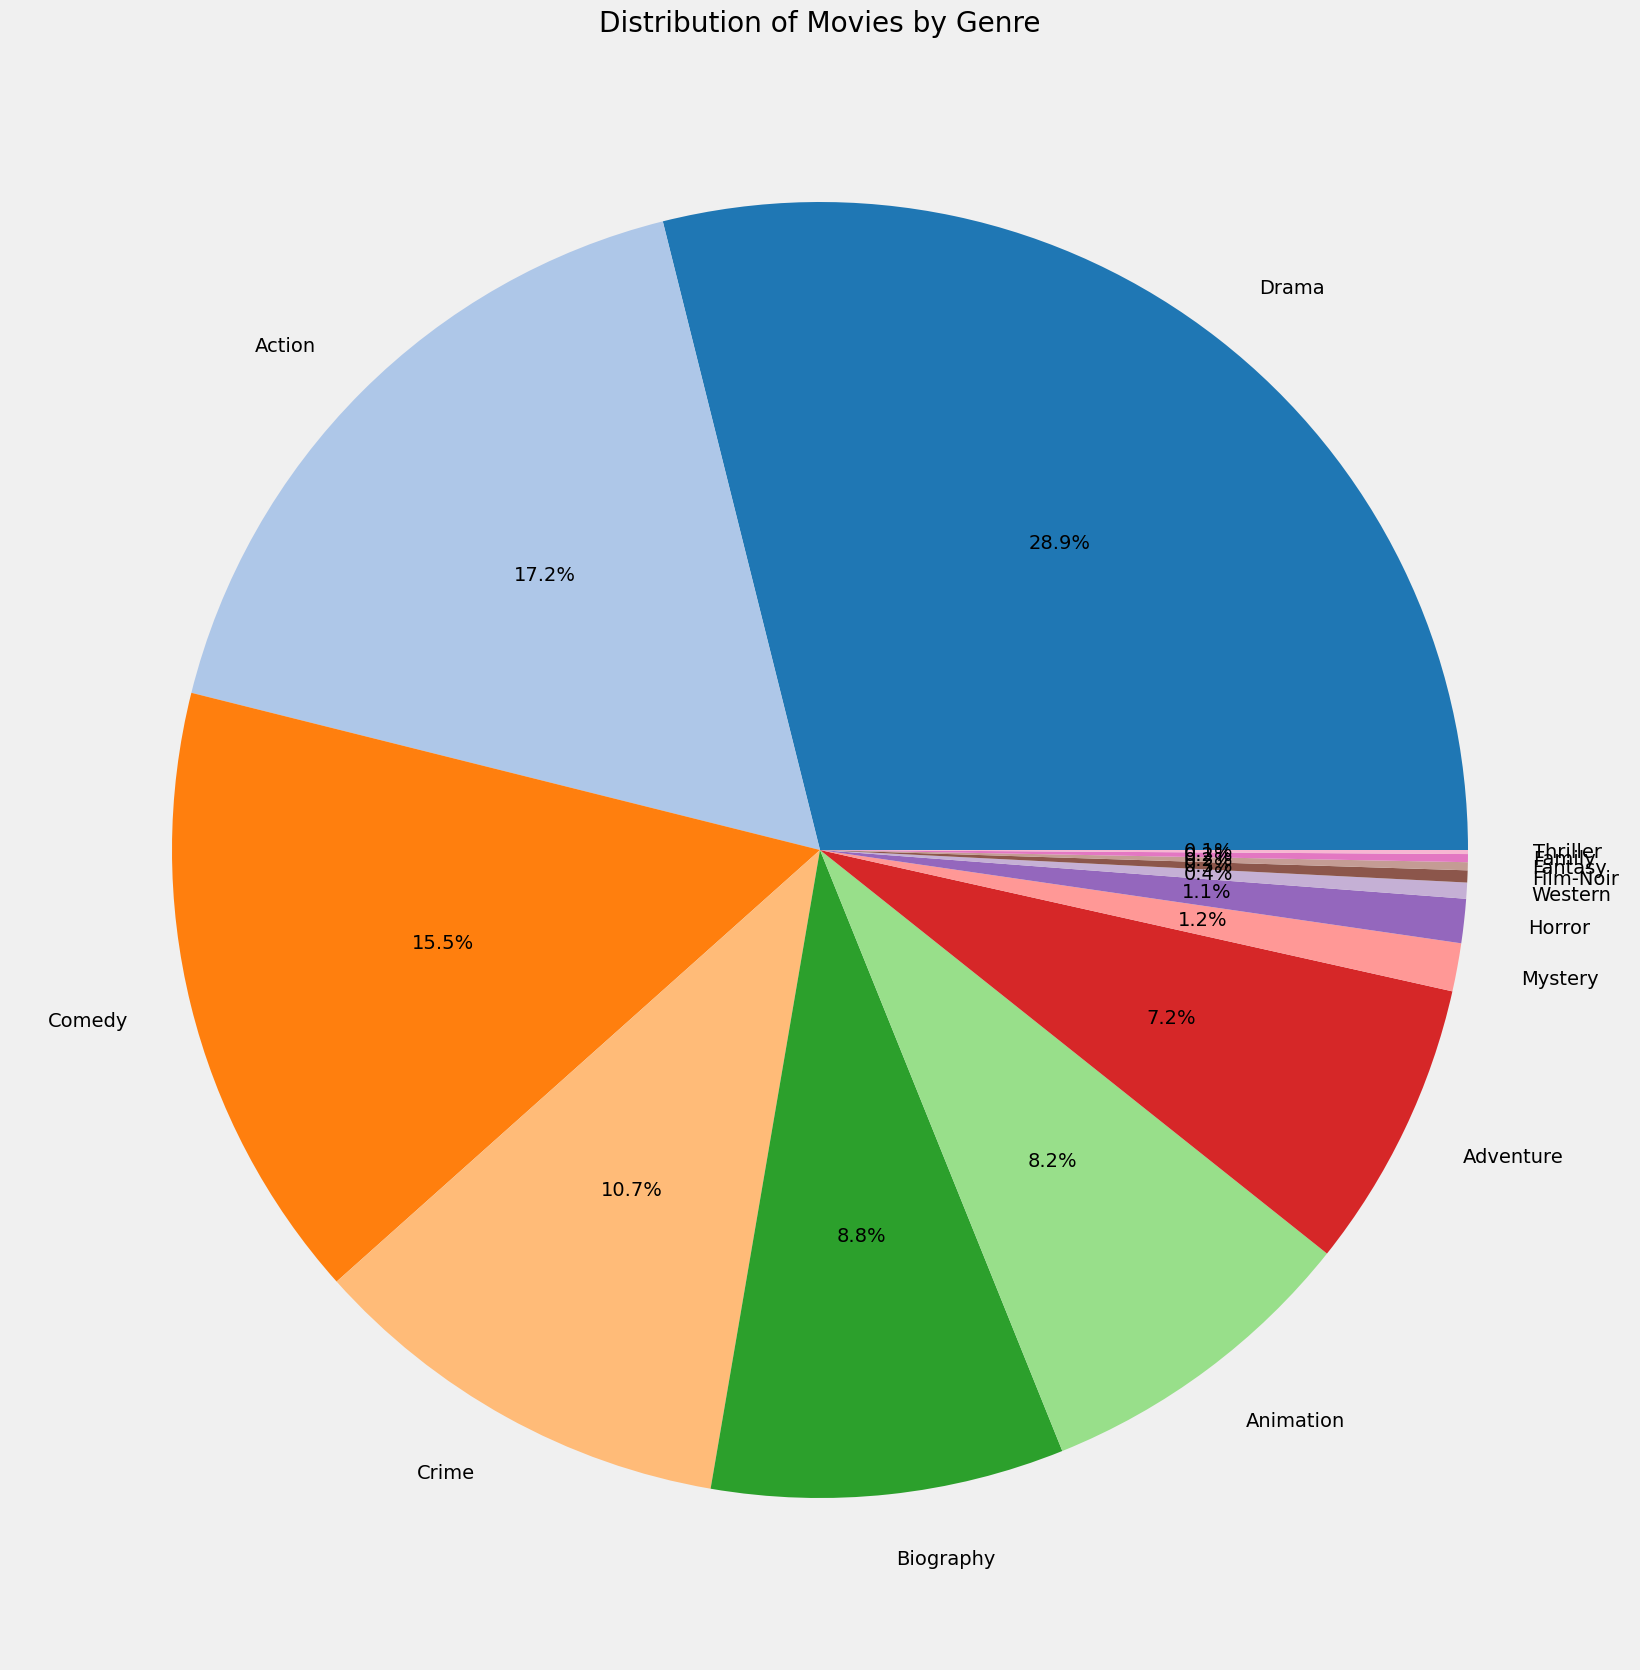

In [7]:
plt.figure(figsize=(20,20))
MOVIE_DF['Genre'].str.split(',').str[0].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Distribution of Movies by Genre')
plt.ylabel('')
plt.show()

*Теперь проверим, влияет ли продолжительность фильма и жанр на общее количество его сборов. Для этого почистим наш датафрейм: Отчистим наш датасет от разделителей цены в столбце заработка фильма и переведем в нем значения в сотни млн $, а также, для удобства, удалим столбец с ссылкой на постер фильма*

In [8]:
MOVIE_DF['Gross'] = MOVIE_DF['Gross'].str.replace(',', '').astype(float)
MOVIE_DF['Poster_Link'] = MOVIE_DF['Poster_Link'].str.replace(r'https://m\.media-amazon\.com/images/.+\.jpg', '', regex=True)
MOVIE_DF['Runtime'] = MOVIE_DF['Runtime'].str.replace(' min', '').astype(float)
MOVIE_DF['Genre'] = MOVIE_DF['Genre'].str.split(',').str[0]
NONAN_MOVIE = MOVIE_DF.dropna(subset=['Runtime', 'Gross', 'Genre'])

*Сделаем график зависимости времени фильма и количества егосборов в прокате. Ниже можно увидеть, что около 30 процентов фильмов из топ-1000 длятся около полутора часов, а все остальные больше двух. Также можно сказать, что все фильмы, которые в прокате собрали более 400$ млн, имеют хронометраж не менее 120 минут* 

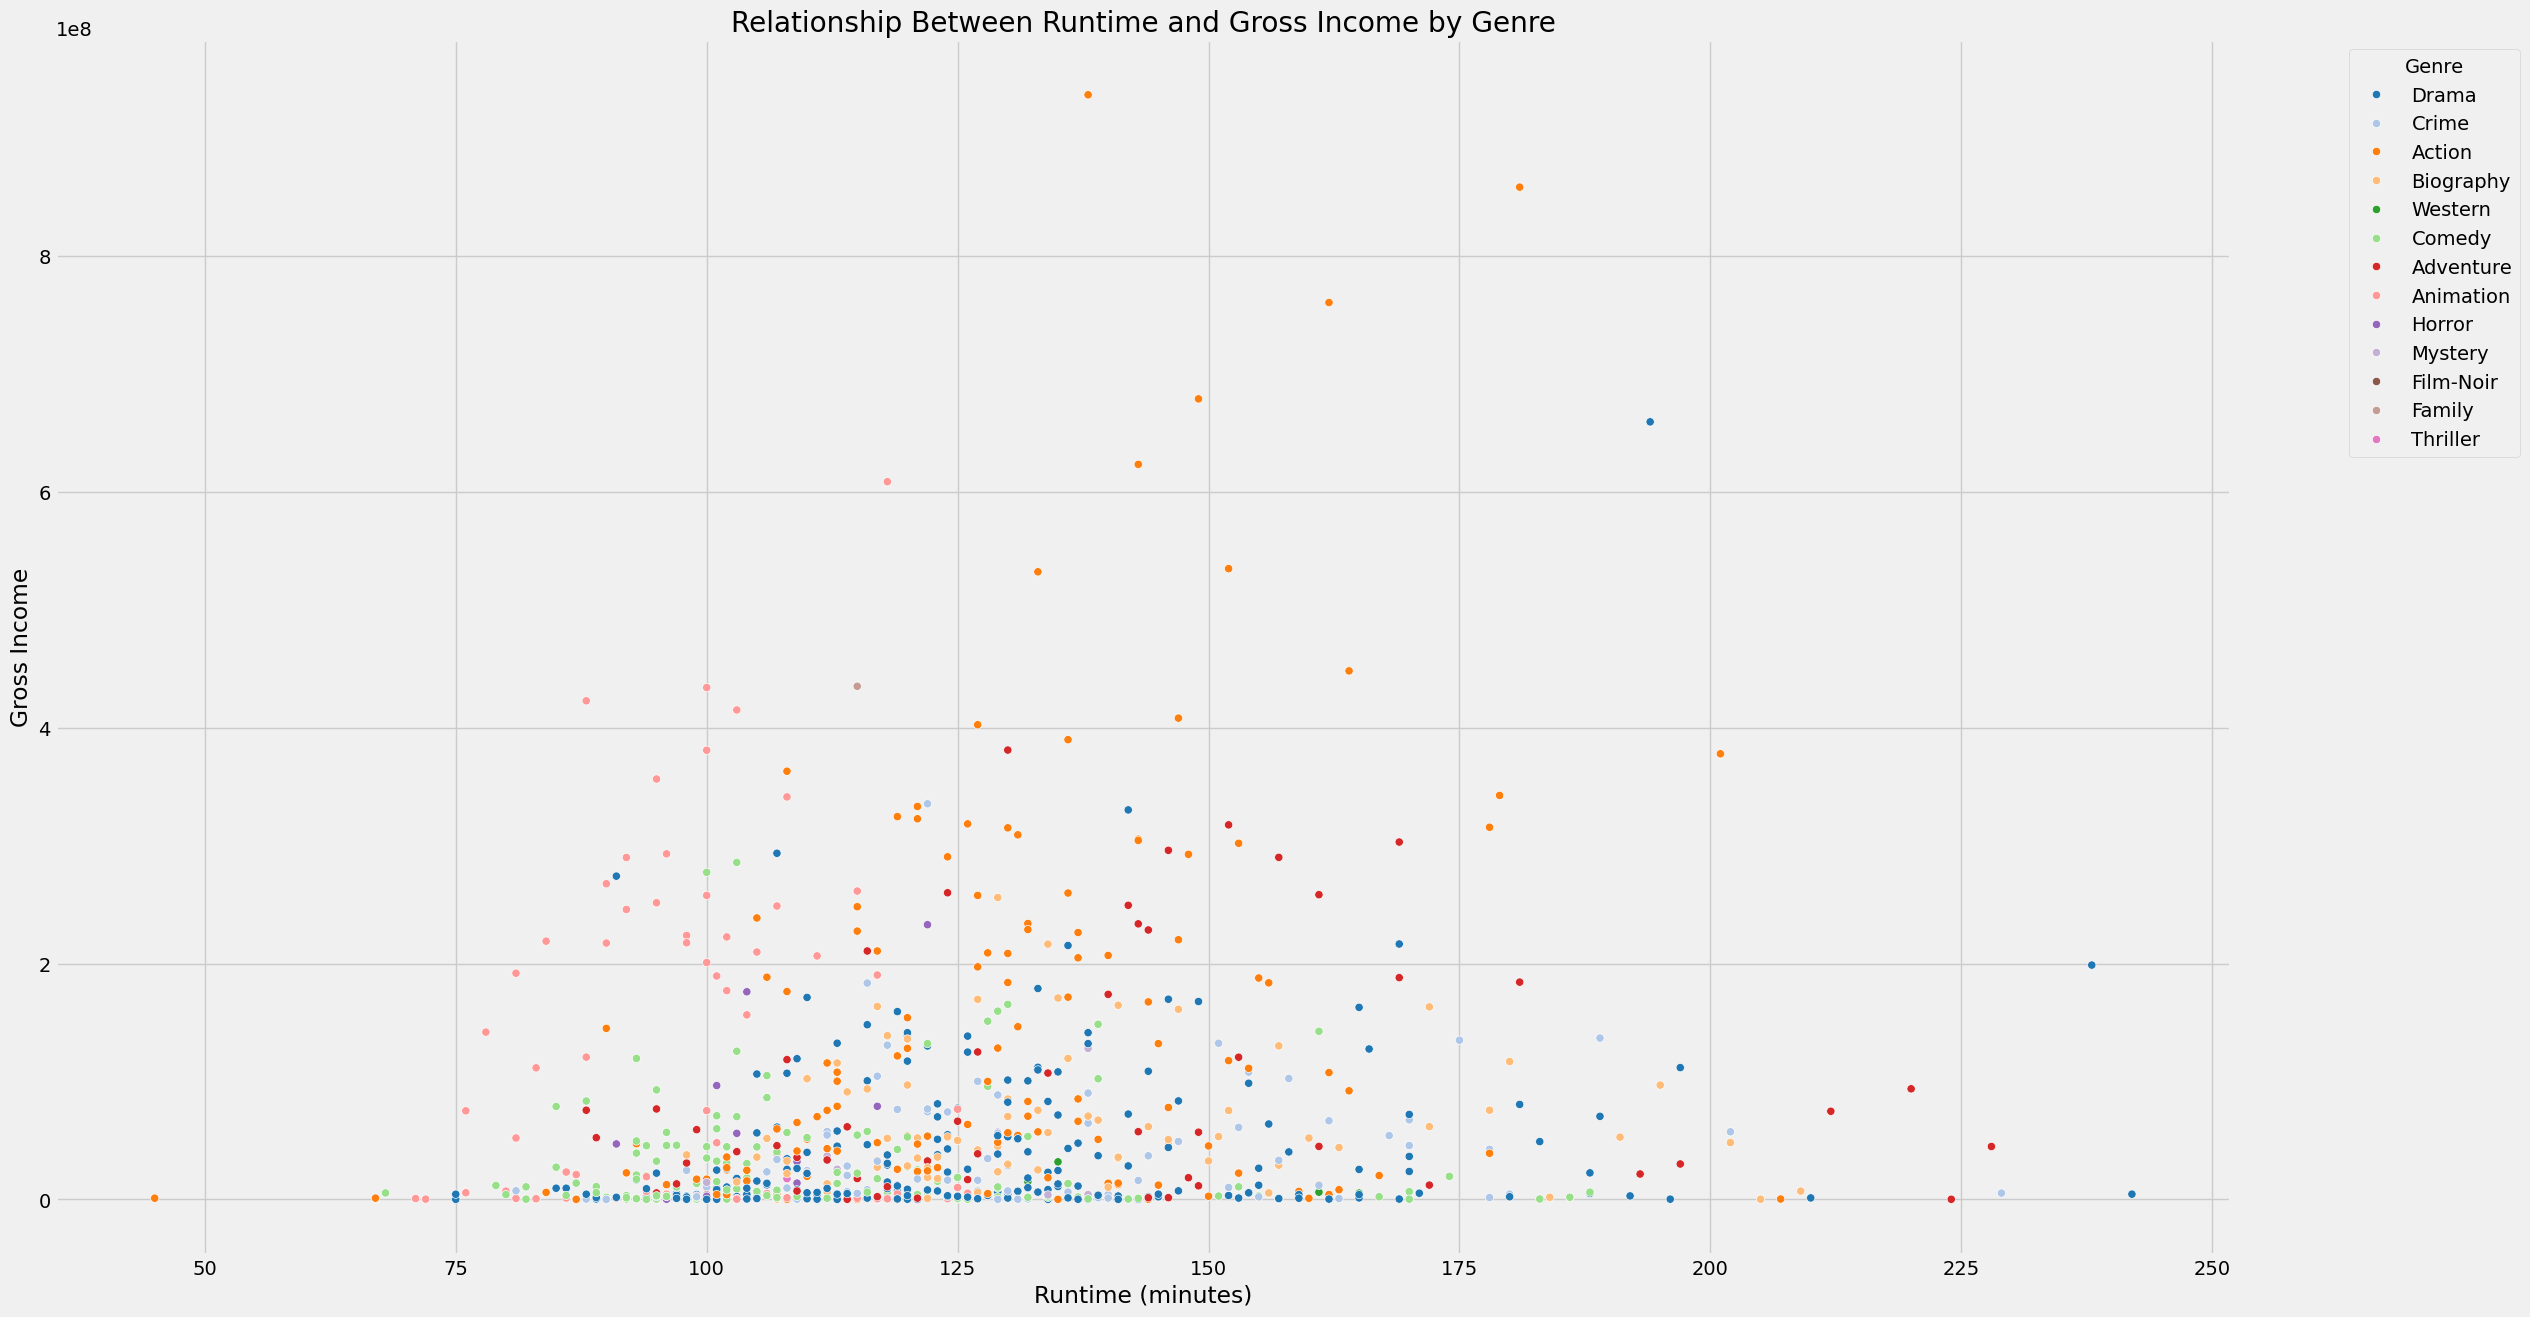

In [9]:
plt.figure(figsize=(25, 15))
sns.scatterplot(x='Runtime', y='Gross', hue='Genre', data=NONAN_MOVIE, palette='tab20', alpha=1)
plt.title('Relationship Between Runtime and Gross Income by Genre')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Gross Income')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

*Далее рассмотрим рейтинг фильмов по отношению к сборам. Из нижнего графика можно сделать вывод, если в планах у режиссера снять великое кино, то на ошеломительные сборы можно не рассчитывать, ведь большинство картин с рейтингом, не ниже 8.5 на IMDB заработали менее 200 млн долларов. Тем не менее, если у фильма будет бюджет всего в несколько миллионов, то естественно для картины сборы даже в 30-40 млн будет победой.*

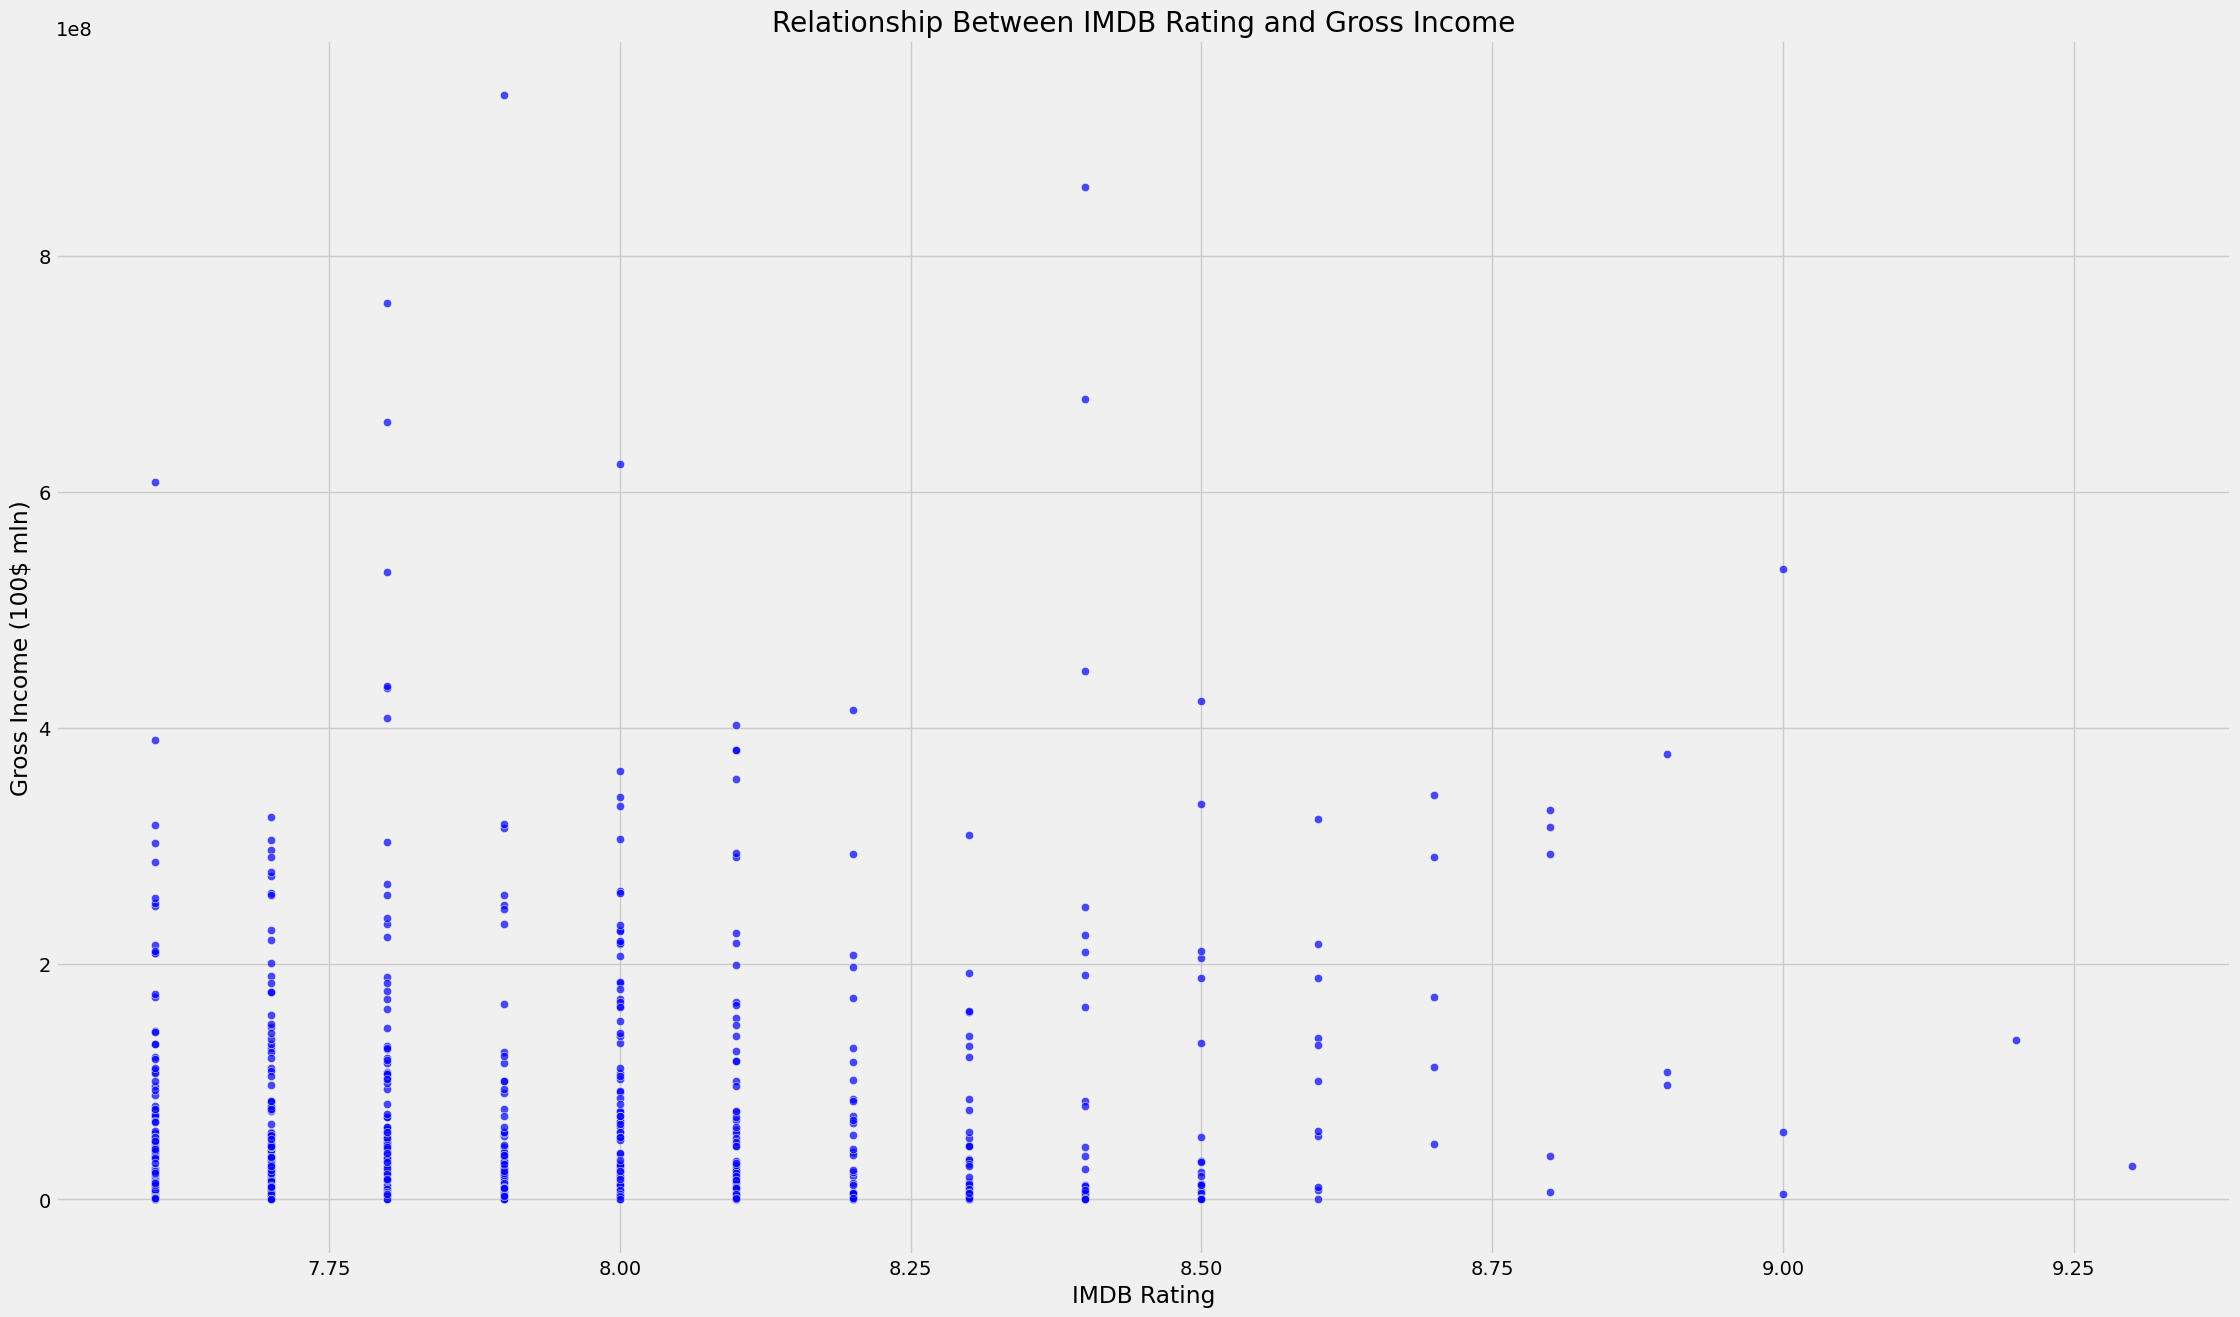

In [10]:
plt.figure(figsize=(25, 15))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=NONAN_MOVIE, color='blue', alpha=0.7, marker='o')
plt.title('Relationship Between IMDB Rating and Gross Income')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Income (100$ mln)')
plt.show()

### Участие определенных актеров в фильмах определенного жанра
*Этот график отображает предпочтения актеров по жанрам среди фильмов с рейтингом IMDb выше 8.5. Также с помощью него можно выявить, какие актеры чаще всего появляются в высокорейтинговых фильмах и определить, предпочитает ли конкретный актер определенные жанры.*

<Figure size 3000x1500 with 0 Axes>

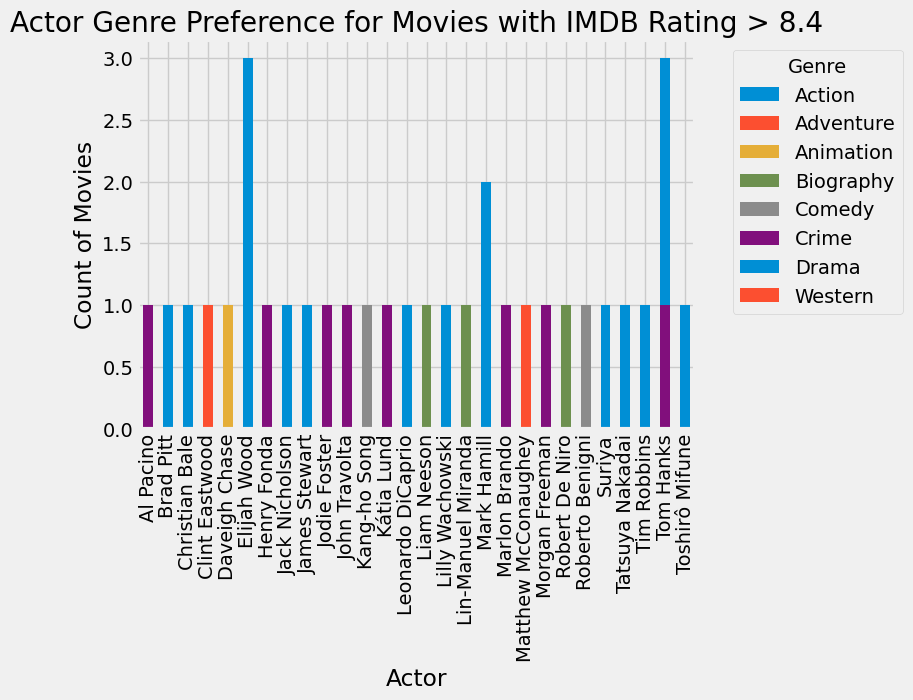

In [11]:
high_rating_movies = MOVIE_DF[MOVIE_DF['IMDB_Rating'] > 8.5]

actor_genre_preference_high_rating = high_rating_movies.groupby(['Star1', 'Genre']).size().unstack(fill_value=0)

plt.figure(figsize=(30, 15))
actor_genre_preference_high_rating.plot(kind='bar', stacked=True)
plt.title('Actor Genre Preference for Movies with IMDB Rating > 8.4')
plt.xlabel('Actor')
plt.ylabel('Count of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Визуализации актеров с наибольшими кассовыми сборами

*График ниже показывает топ-20 самых прибыльных актёров с их суммарнми кассовыми сборами*

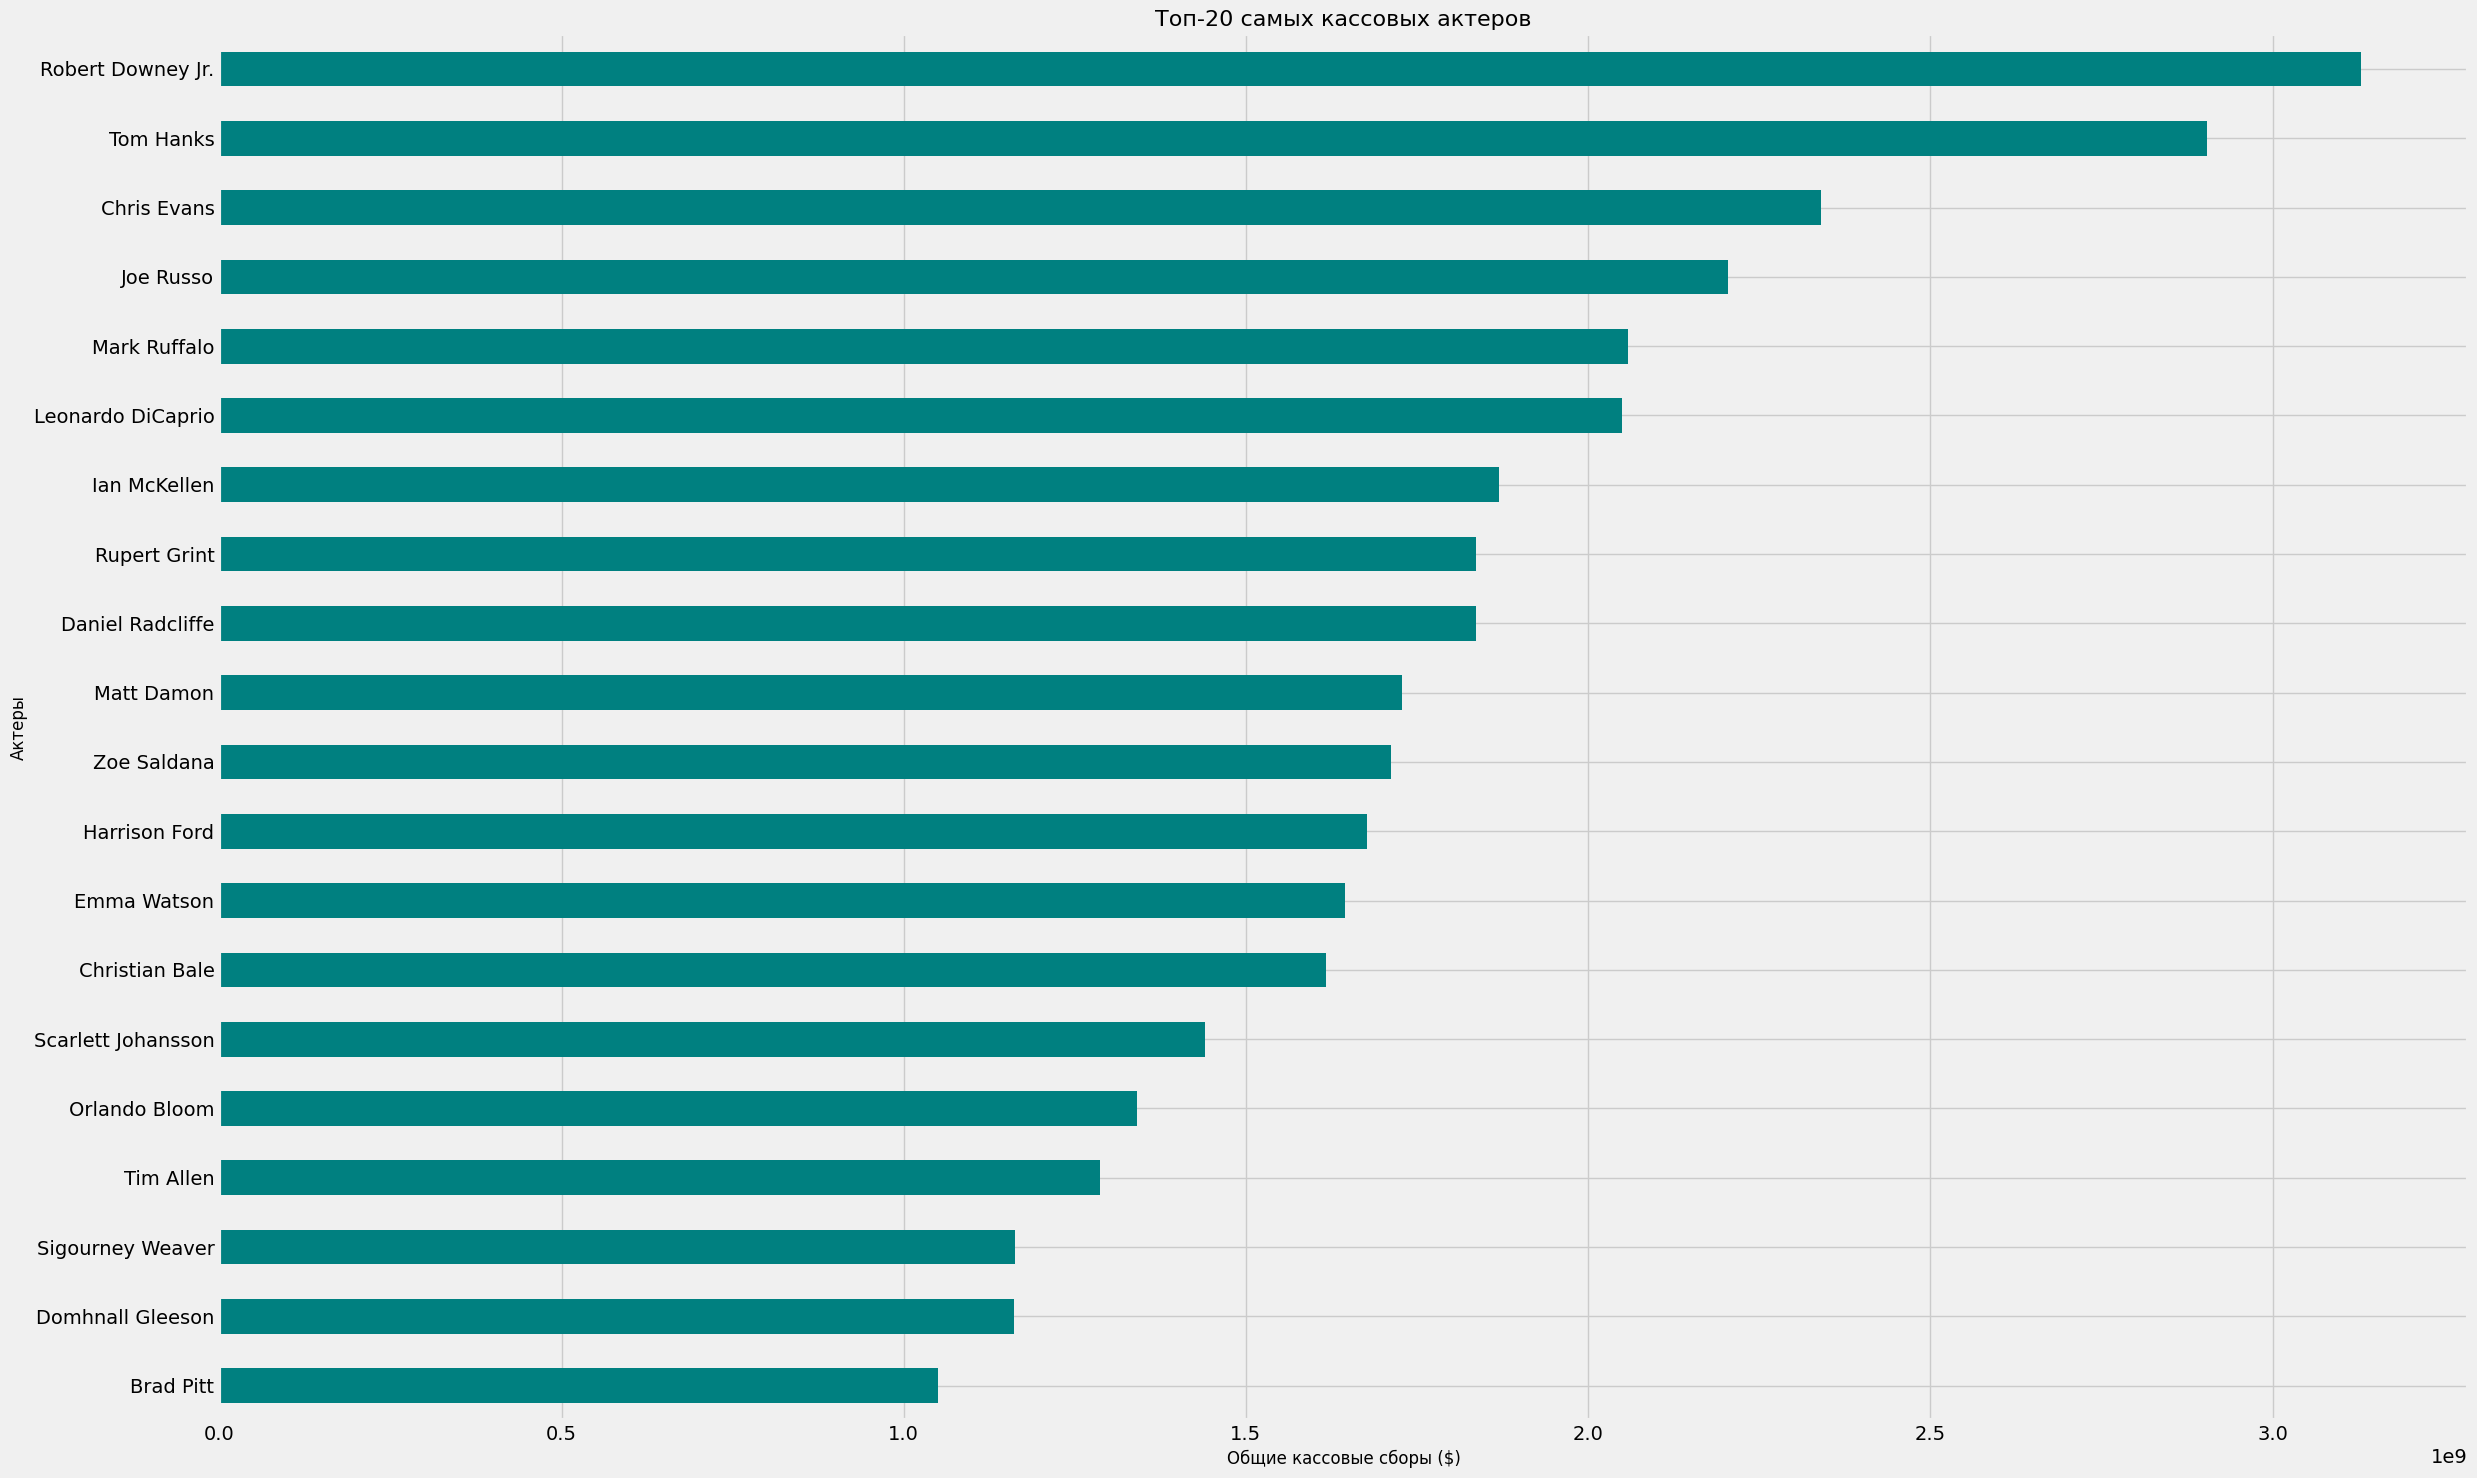

In [12]:
actors_columns = ['Star1', 'Star2', 'Star3', 'Star4']
all_actors_gross = NONAN_MOVIE.melt(
    id_vars=['Gross'], value_vars=actors_columns, value_name='Actor'
)
top_actors_gross = (
    all_actors_gross.groupby('Actor')['Gross']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(25,15))
top_actors_gross.sort_values().plot(kind='barh', color='teal')
plt.title('Топ-20 самых кассовых актеров', fontsize=16)
plt.xlabel('Общие кассовые сборы ($)', fontsize=12)
plt.ylabel('Актеры', fontsize=12)
plt.tight_layout()
plt.show()


*Найдём режиссера, чей фильм имеет наивысший рейтинг на IMDb в датафрейме MOVIE_DF, и выведем информацию о нем, а также список фильмов, которые он снял.*

In [13]:
max_rating_director_info = MOVIE_DF[MOVIE_DF['Director'] == MOVIE_DF['Director'].loc[MOVIE_DF['IMDB_Rating'].idxmax()]]
max_rating_value = MOVIE_DF['IMDB_Rating'].max()

print(f"Director with the highest IMDB Rating: {max_rating_director_info['Director'].values[0]} ({max_rating_value})")
print("Films directed by this person:")
print(max_rating_director_info['Series_Title'].tolist())

Director with the highest IMDB Rating: Frank Darabont (9.3)
Films directed by this person:
['The Shawshank Redemption', 'The Green Mile']


### Корреляционная матрица характеристик фильмов
*На этом графике представлена матрица корреляции между различными характеристиками фильмов (например, рейтингом, длительностью, числом голосов и т.д.). Это полезно для выявления взаимосвязей между переменными.*

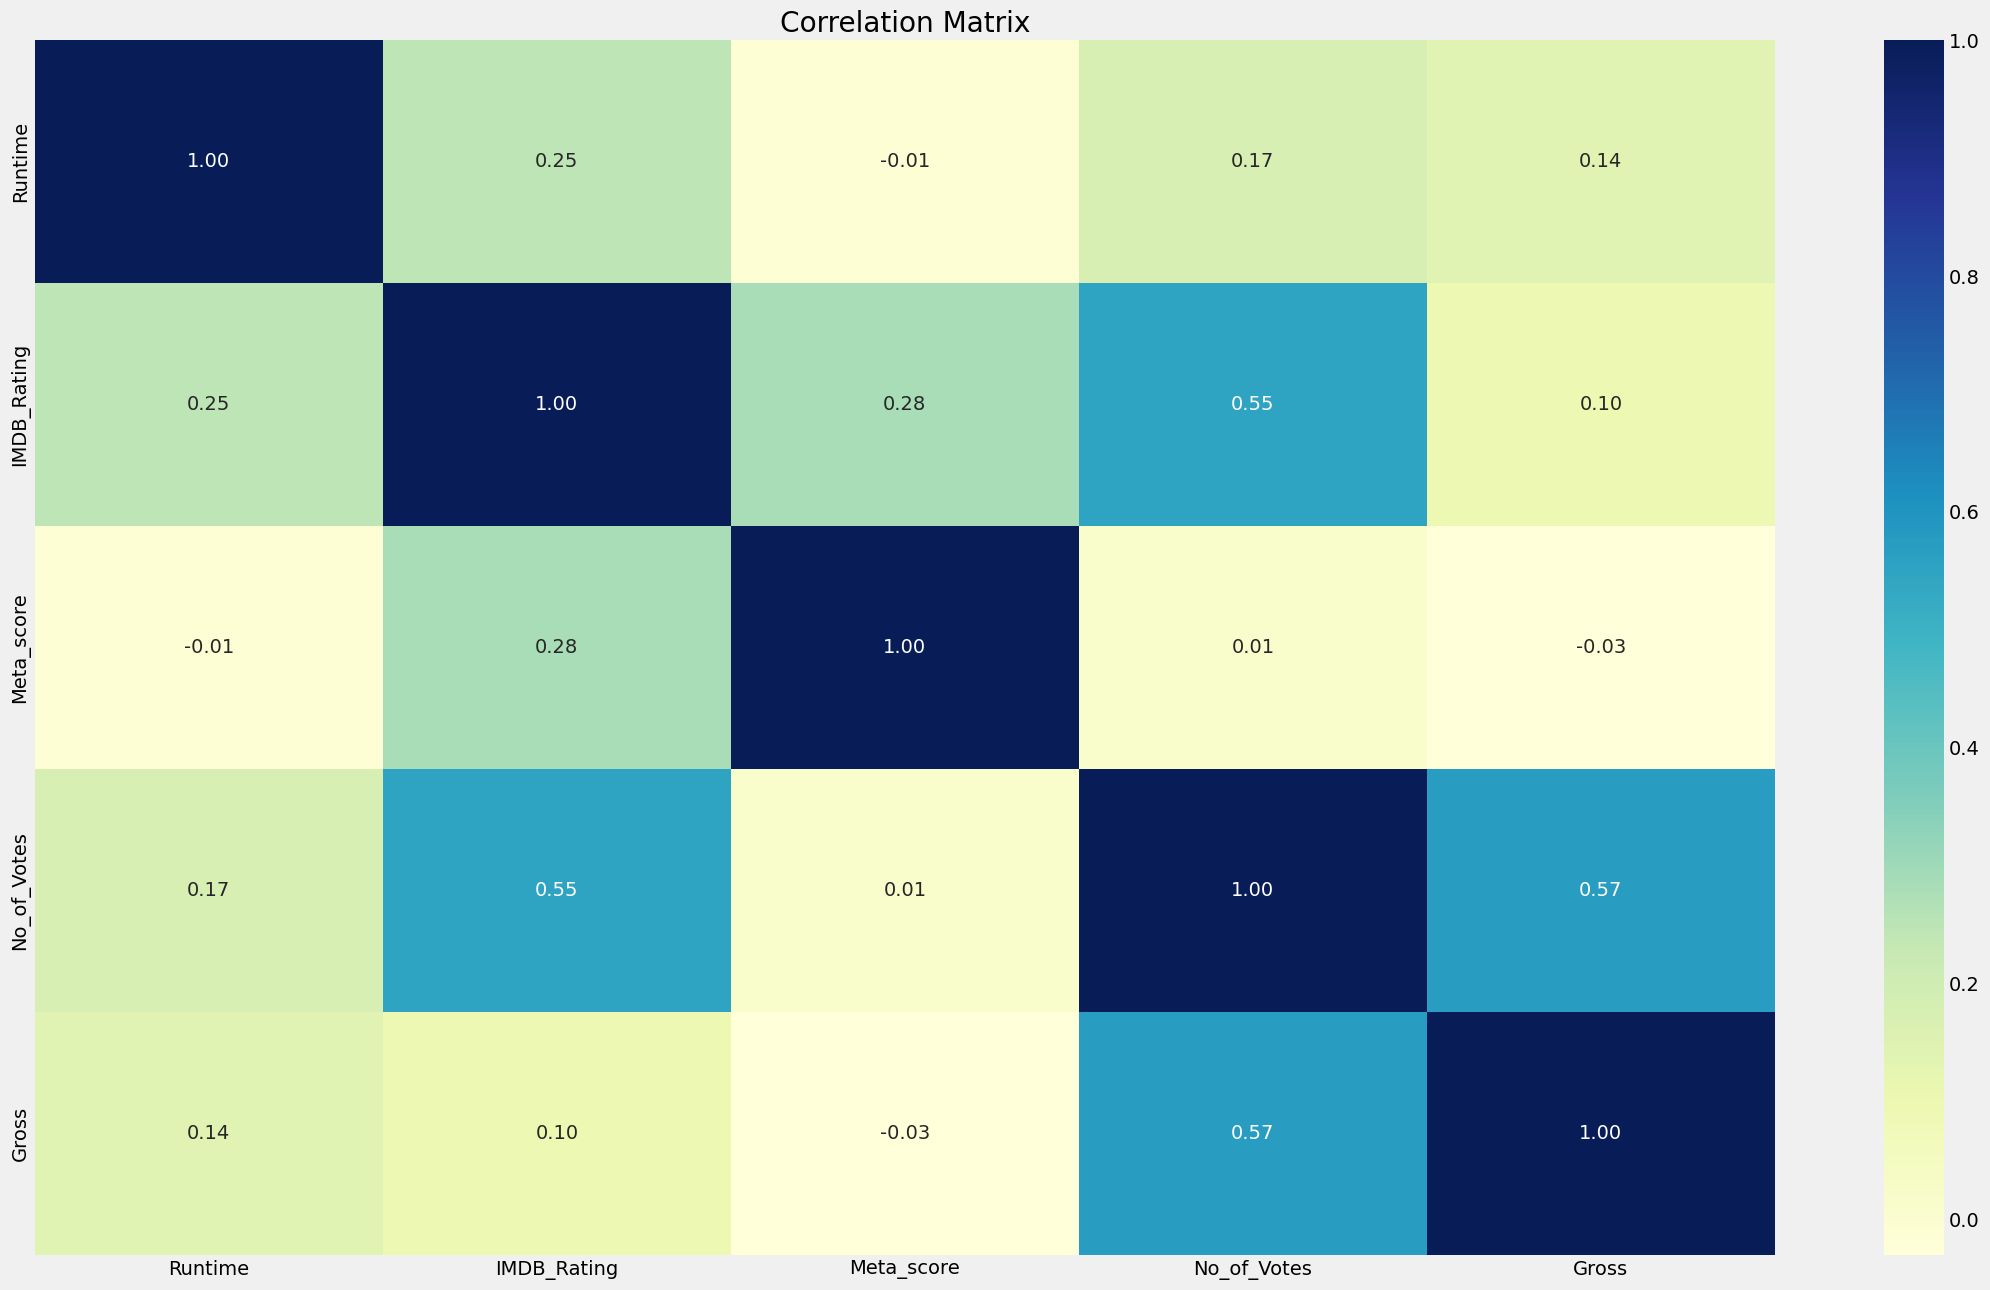

In [14]:
numeric_cols = ['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
CORR_M = NONAN_MOVIE[numeric_cols].corr()

    
plt.figure(figsize=(25, 15))
sns.heatmap(CORR_M, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('Correlation Matrix')
plt.show()

## Визуализация данных и результаты
В ходе работы были использованы различные методы визуализации:
- Гистограммы для анализа распределения продолжительности фильмов и их рейтингов.
- Диаграммы разброса для изучения зависимости между рейтингом IMDb и доходом.
- Круговые диаграммы для визуализации популярности жанров.
- Графики временных рядов для анализа трендов выпуска фильмов.

Основные выводы:
- Фильмы с более высоким рейтингом IMDb чаще получают больше голосов и собирают больший доход.
- Определены наиболее успешные жанры, такие как драма и экшн.
- Успех фильмов часто связан с известными актёрами и режиссёрами.

## Заключение
Цель исследования была достигнута: на основе анализа данных удалось выявить ключевые факторы, влияющие на успех фильмов. Результаты могут быть полезны для кинокомпаний и исследователей киноиндустрии.
